**Importing Libraries**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection and analysis**

In [105]:
df=pd.read_csv('/content/bank_Churn.csv')

In [106]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [107]:
df.shape

(165034, 14)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  int64  
 11  IsActiveMember   165034 non-null  int64  
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 17.6+ MB


In [90]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**EXPLORATORY DATA ANALYSIS**

**Data Cleaning**

In [109]:
#removing irrelevant columns
drop_cols=['Surname','CustomerId']

df.drop(drop_cols,axis=1, inplace=True)

In [110]:
df.columns

Index(['id', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**Checking for Null values**

In [158]:
df.isnull().sum()

id                 0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [159]:
df= df.dropna(axis=1)

**FEATURE ENGINEERING**

**Encoding categorical data**

In [121]:
#Converting categorical varibles into numerical variables using Label Encoding
df['Geography'].value_counts()

Geography
2    94215
1    36213
0    34606
Name: count, dtype: int64

In [122]:
df['Geography']=df['Geography'].replace(['Germany'],'0')
df['Geography']=df['Geography'].replace(['Spain'],'1')
df['Geography']=df['Geography'].replace(['France'],2)

In [123]:
df['Gender']=df['Gender'].replace(['Male'],'0')
df['Gender']=df['Gender'].replace(['Female'],'1')

In [124]:
df.dtypes

id                   int64
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Data visualizations**

Estimating customer with which Geography,Gender is maximum to churn

<Axes: xlabel='Geography', ylabel='count'>

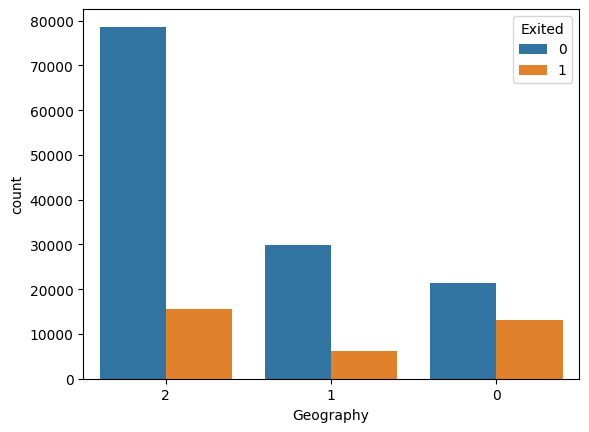

In [125]:
ax=sns.countplot(x=df['Geography'],hue=df['Exited'])
ax

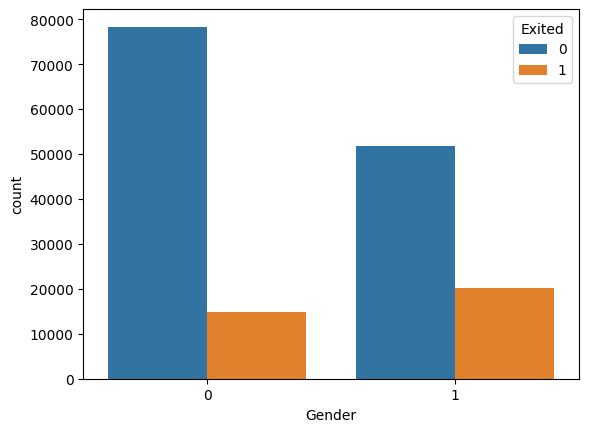

In [126]:
g=sns.countplot(x=df['Gender'],hue=df['Exited'])

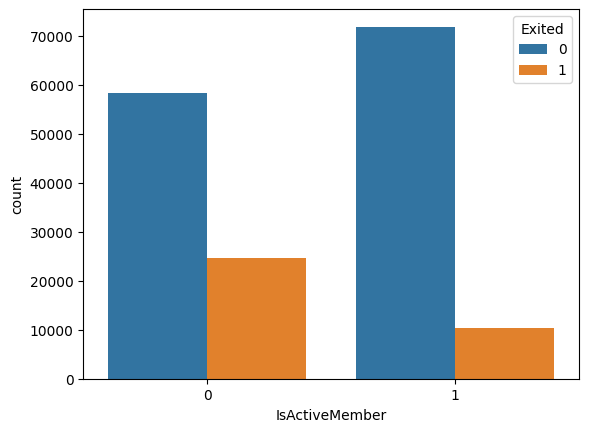

In [127]:
ac=sns.countplot(x=df['IsActiveMember'],hue=df['Exited'])

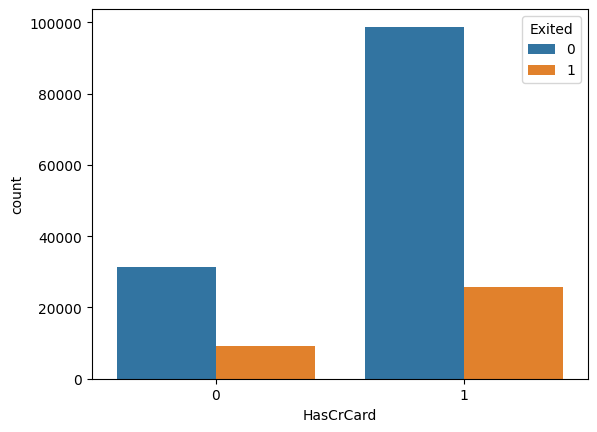

In [128]:
cr=sns.countplot(x=df['HasCrCard'],hue=df['Exited'])

Comparing Tenure and Exited

<Axes: xlabel='Tenure', ylabel='Exited'>

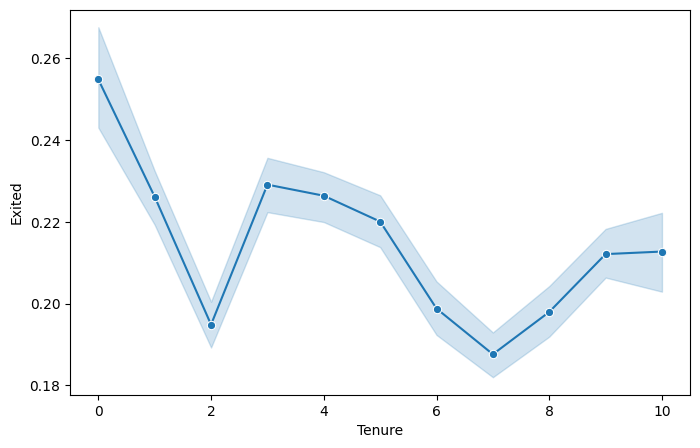

In [129]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Tenure'],y=df['Exited'],marker='o')

The above graph shows the relationship between Tenure and churn. The lesser the tenure, more are the chances to churn. so one of the ways to reduce customer churning would be to retain customers for a longer tenure, it reduces the churn rate

**Analysing Target variable**

In [130]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

**Handling Imbalanced data with SMOTE**

In [131]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [134]:
y_res.value_counts()

Exited
0    130113
1    130113
Name: count, dtype: int64

**Splitting The Dataset into Training Set and Test Set**

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

**Feature Scaling**

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
sc = StandardScaler()

In [139]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [140]:
x_train

array([[ 0.69763447, -1.28209637,  0.91172568, ...,  0.69355573,
        -0.72976392, -0.24397777],
       [-1.68104266,  0.28300244, -1.52867757, ...,  0.69355573,
         1.37030616, -0.48717088],
       [-1.66933426,  0.9992341 ,  0.91172568, ...,  0.69355573,
         1.37030616,  0.54946317],
       ...,
       [ 0.31661731,  1.15839669,  0.46017783, ...,  0.69355573,
        -0.72976392,  0.99339067],
       [-0.66310506, -1.18925153,  0.91172568, ...,  0.69355573,
         1.37030616,  0.72068136],
       [ 0.44007057,  1.51651252, -1.52867757, ...,  0.69355573,
         1.37030616, -0.34119065]])

**Model Building**

Using ML Algorithms:Logistic Regression, Random Forest, Decision Tree,XG Boost

**Logistic Regression**

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
x_train

array([[ 0.69763447, -1.28209637,  0.91172568, ...,  0.69355573,
        -0.72976392, -0.24397777],
       [-1.68104266,  0.28300244, -1.52867757, ...,  0.69355573,
         1.37030616, -0.48717088],
       [-1.66933426,  0.9992341 ,  0.91172568, ...,  0.69355573,
         1.37030616,  0.54946317],
       ...,
       [ 0.31661731,  1.15839669,  0.46017783, ...,  0.69355573,
        -0.72976392,  0.99339067],
       [-0.66310506, -1.18925153,  0.91172568, ...,  0.69355573,
         1.37030616,  0.72068136],
       [ 0.44007057,  1.51651252, -1.52867757, ...,  0.69355573,
         1.37030616, -0.34119065]])

In [143]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,y_pred1))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred1))
print('Classification_report: \n',classification_report(y_test,y_pred1))

Accuracy score : 0.8157503714710252
Confusion_matrix: 
 [[31389  7469]
 [ 6915 32295]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81     38858
           1       0.81      0.82      0.82     39210

    accuracy                           0.82     78068
   macro avg       0.82      0.82      0.82     78068
weighted avg       0.82      0.82      0.82     78068



**Decision Tree**

In [144]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)
y_pred2=clf_gini.predict(x_test)

print('Accuracy score :',accuracy_score(y_test,y_pred2))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred2))
print('Classification_report: \n',classification_report(y_test,y_pred2))

Accuracy score : 0.8078726238663729
Confusion_matrix: 
 [[30034  8824]
 [ 6175 33035]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80     38858
           1       0.79      0.84      0.81     39210

    accuracy                           0.81     78068
   macro avg       0.81      0.81      0.81     78068
weighted avg       0.81      0.81      0.81     78068



**Random Forest**

In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=10)
rfc.fit(x_train,y_train)
y_pred3=rfc.predict(x_test)

print('Accuracy score :',accuracy_score(y_test,y_pred3))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred3))
print('Classification_report: \n',classification_report(y_test,y_pred3))

Accuracy score : 0.9004201465389148
Confusion_matrix: 
 [[35812  3046]
 [ 4728 34482]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     38858
           1       0.92      0.88      0.90     39210

    accuracy                           0.90     78068
   macro avg       0.90      0.90      0.90     78068
weighted avg       0.90      0.90      0.90     78068



**XG Boost**

In [154]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(x_train, y_train)
y_pred4=model_xgb.predict(x_test)

print('Accuracy score :',accuracy_score(y_test,y_pred4))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred4))
print('Classification_report: \n',classification_report(y_test,y_pred4))


Accuracy score : 0.9048137521135421
Confusion_matrix: 
 [[36175  2683]
 [ 4748 34462]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     38858
           1       0.93      0.88      0.90     39210

    accuracy                           0.90     78068
   macro avg       0.91      0.90      0.90     78068
weighted avg       0.91      0.90      0.90     78068



Text(0.5, 1.0, 'Accuracy Score: 0.9048137521135421')

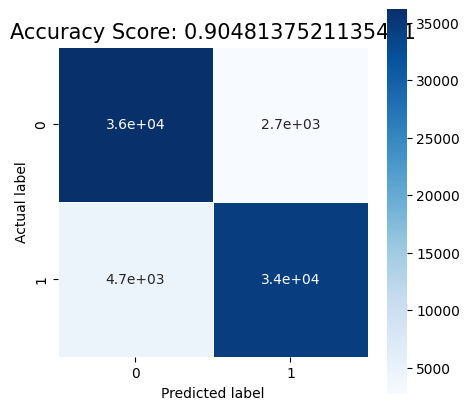

In [155]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)


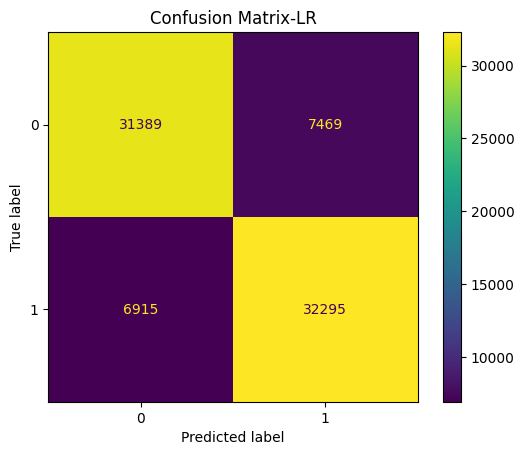

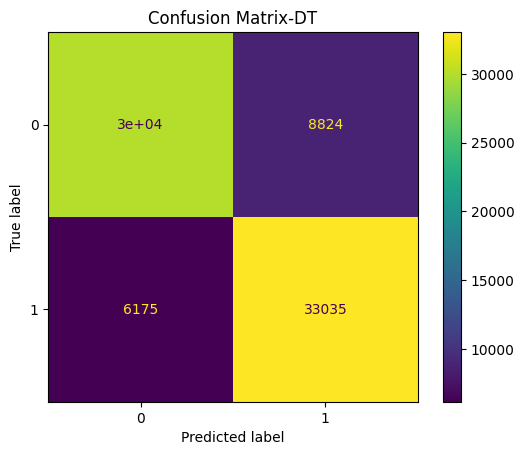

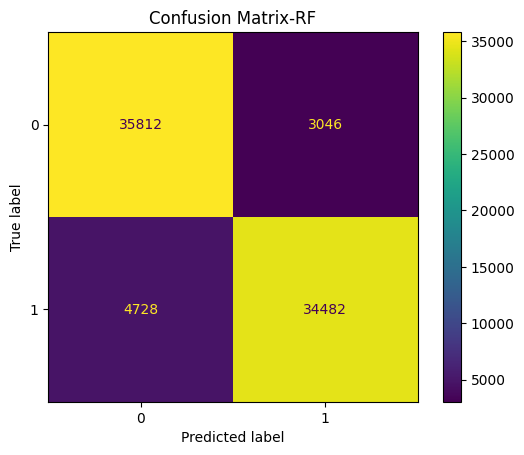

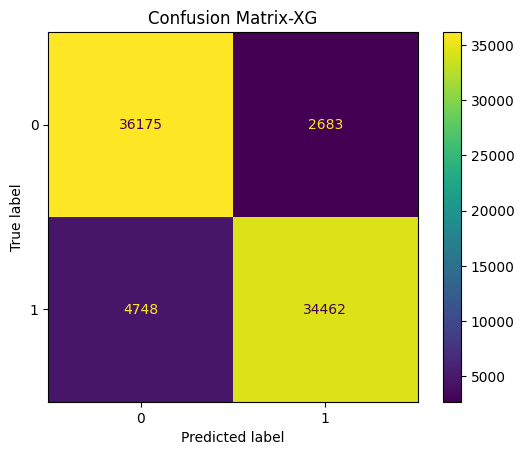

In [162]:
#visualising confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred1))
disp.plot()
plt.title('Confusion Matrix-LR')
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred2))
disp.plot()
plt.title('Confusion Matrix-DT')
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred3))
disp.plot()
plt.title('Confusion Matrix-RF')
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred4))
disp.plot()
plt.title('Confusion Matrix-XG')
plt.show()


**Accuracy Summary**

In [148]:
performance_summary = pd.DataFrame({
    'Model':['LR','DT','RF','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4)]
})

In [149]:
performance_summary

,Model,ACC
0,LR,0.815750
1,DT,0.807873
2,RF,0.900420
3,XGB,0.904814


**Precision Summary**

In [150]:
from sklearn.metrics import precision_score
performance_summary2 = pd.DataFrame({
    'Model':['LR','DT','RF','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4)
          ]
})

In [151]:
performance_summary2

,Model,PRECISION
0,LR,0.812167
1,DT,0.789197
2,RF,0.918834
3,XGB,0.927770


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)


**Conclusion:**

XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy